In [1]:
from Simulation import Simulation
from modules.Particle import Particle
from modules.Propagation import Propagation
from modules.Observer import Observer
from modules.Source import Source
import numpy as np

## Simulation of Random Walk Propagation with Spherical Observer

Initialize the simulation by calling Simulation(). The class instance simulation contains all information relevant for the complete simulation.

In [2]:
simulation = Simulation()

### source
gyro_radius = 30.0
diffusion_tensor = np.array([1.0, 1.0, 100.0], dtype=np.float32)
source_position = np.zeros(3, dtype=np.float32)
nr_particles = 100
source = Source(nr_particles, source_position, gyro_radius, diffusion_tensor)
simulation.add_particles(source)

### propagation
step_size = 1.0
propagation = Propagation(step_size)
steps = 10**4
t_max = 10**4
time = np.linspace(1, t_max, steps, dtype=np.float32)
simulation.add_propagation(propagation, time)

init simulation completed


#### Adding time evolution observer

In [3]:
observer = Observer()
detailed_range = 500 # observe the initial 500 steps (default = 0)
observer_resolution = 500 # also observe each 500th step (default = 1)
observer.change_observer_resolution(detailed_range, observer_resolution)

init observer completed


#### Adding observer spheres

In [4]:
sphere_radii = np.array([1.0*10**1, 1.0*10**2, 2.0*10**2, 4.0*10**2, 5.0*10**2], dtype=np.float32)
observer.add_observer_spheres(sphere_radii)
simulation.add_observer(observer)

added observer spheres with radii:  [ 10. 100. 200. 400. 500.]


### -> Run Simulation

In [5]:
data = simulation.run_simulation()

## Analizing Simulation Data

data with radius == -1.0 are from the time evolution observer. All other data is from the spherical observer

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data).T
df.columns = ['id', 't', 'x', 'y', 'z', 'radius']
df

,id,t,x,y,z,radius
0,0.0,1.0,-0.577350,-0.577350,0.577350,-1.0
1,1.0,1.0,-0.577350,0.577350,0.577350,-1.0
2,2.0,1.0,-0.577350,0.577350,-0.577350,-1.0
3,3.0,1.0,-0.577350,0.577350,0.577350,-1.0
4,4.0,1.0,0.577350,0.577350,0.577350,-1.0
...,...,...,...,...,...,...
55058,97.0,9996.0,-15.011108,-15.011108,499.989197,500.0
55059,4.0,9998.0,34.641029,34.641029,397.218781,400.0
55060,59.0,9998.0,17.320513,-17.320513,-499.989227,500.0
55061,28.0,10000.0,-33.486328,33.486328,-87.757111,100.0


### 1. Data of time evolution observer

In [7]:
df_time_evolution = df.loc[df['radius'] == -1.0]

nr_particles = 100
x = df_time_evolution['x'].values
z = df_time_evolution['z'].values
t = df_time_evolution['t'].values
times = []
kappa_xx = []
kappa_zz = []
for j in range(int(len(x)/nr_particles)):
    t_j = t[j*nr_particles]
    kappa_xx_current = 0
    kappa_zz_current = 0
    for i in range(nr_particles):
        x_i = x[j*nr_particles+i]
        z_i = z[j*nr_particles+i]
        kappa_xx_current = kappa_xx_current + x_i**2
        kappa_zz_current = kappa_zz_current + z_i**2
    kappa_xx.append(kappa_xx_current/(2*t_j))
    kappa_zz.append(kappa_zz_current/(2*t_j))
    times.append(t_j)

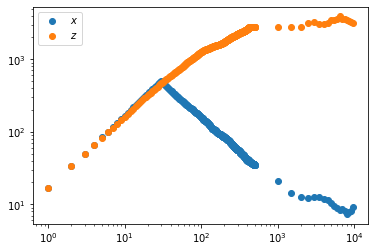

In [8]:
from modules.Plotter import Plotter
import matplotlib.pyplot as plt
plt.scatter(times, kappa_xx, label='$x$')
plt.scatter(times, kappa_zz, label='$z$')
plt.legend()
plt.loglog()
plt.show()

### 2. Data of shperical observer

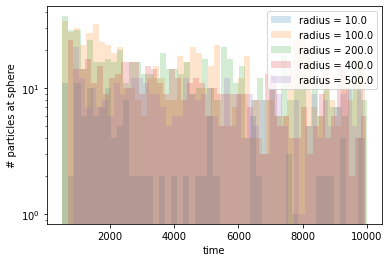

In [9]:
for sphere_radius in sphere_radii:
    plt.hist(df.loc[df['radius'] == sphere_radius]['t'], bins=50, alpha=0.2, label='radius = '+str(sphere_radius))
plt.xlabel('time')
plt.ylabel('# particles at sphere')
plt.legend()
plt.yscale('log')
plt.show()